# IMDB를 CNN과 LSTM을 연결하여 학습시키기

In [1]:
from keras.datasets import imdb

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

Using TensorFlow backend.


데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스


In [2]:
from keras.preprocessing import sequence

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [17]:
from keras.models import Sequential
from keras import layers

model = Sequential()

model.add(layers.Embedding(max_features, 32, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 335,553
Trainable params: 335,553
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

W0805 03:39:36.451924  2484 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 874us/step - loss: 0.4838 - acc: 0.7538 - val_loss: 0.4274 - val_acc: 0.8184
Epoch 2/10
20000/20000 [==============================] - 18s 911us/step - loss: 0.2619 - acc: 0.8989 - val_loss: 0.3021 - val_acc: 0.8794
Epoch 3/10
20000/20000 [==============================] - 19s 928us/step - loss: 0.2004 - acc: 0.9259 - val_loss: 0.3173 - val_acc: 0.8650
Epoch 4/10
20000/20000 [==============================] - 19s 935us/step - loss: 0.1637 - acc: 0.9395 - val_loss: 0.3242 - val_acc: 0.8886
Epoch 5/10
20000/20000 [==============================] - 19s 954us/step - loss: 0.1374 - acc: 0.9516 - val_loss: 0.3466 - val_acc: 0.8702
Epoch 6/10
20000/20000 [==============================] - 18s 909us/step - loss: 0.1206 - acc: 0.9577 - val_loss: 0.3877 - val_acc: 0.8718
Epoch 7/10
20000/20000 [==============================] - 18s 907us/step - loss: 0.0980 - acc: 0.9666 - val_loss: 0.3

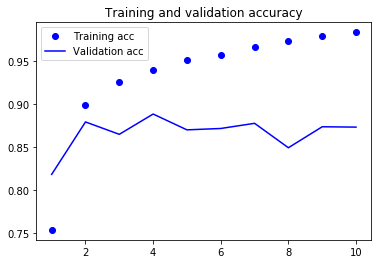

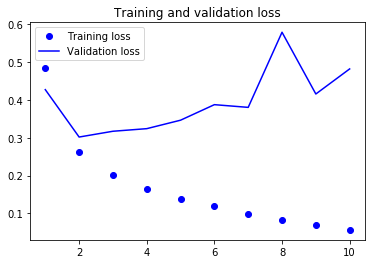

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()